In [24]:
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
base = pd.read_csv('/home/bernardo/Documentos/curso_Machine_A-Z/dataset/credit-data.csv')

In [7]:
base.loc[base['age']<0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [8]:
base.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [9]:
base['age'].mean()
base['age'][base.age > 0].mean()
base.loc[base.age <0,'age']=40.92
base.loc[pd.isnull(base['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [10]:
previsores = base.iloc[:,1:4].values
classe = base.iloc[:,4].values

In [11]:
imputer = Imputer()
imputer = imputer.fit(previsores[:,0:3])
previsores[:,0:3] = imputer.transform(previsores[:,0:3])

/home/bernardo/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [12]:
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(previsores, classe, test_size=0.2, random_state=42)

In [34]:
clf = KNeighborsClassifier(n_neighbors=3)

In [35]:
clf.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [36]:
pred = clf.predict(xtest)

In [37]:
accuracy_score(ytest,pred)

0.9825

In [22]:
matrix = confusion_matrix(ytest,pred)

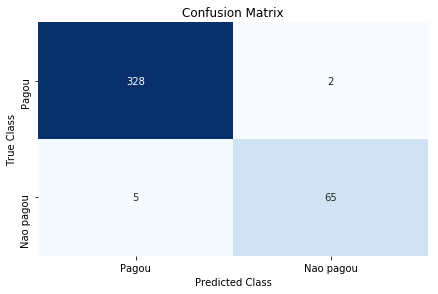

In [25]:
dataframe = pd.DataFrame(matrix, index=['Pagou','Nao pagou'], columns=['Pagou','Nao pagou'])
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues",fmt='g')
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

In [40]:
import collections
collections.Counter(ytest)

Counter({1: 70, 0: 330})